### Loan Default Problem

## Frame the problem
- Build a model whether someone will default or not


### Acquire the Data

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [81]:
df = pd.read_csv('data/historical_loan.csv')

In [82]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


### Refine the Data

In [83]:
df.isnull()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [84]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

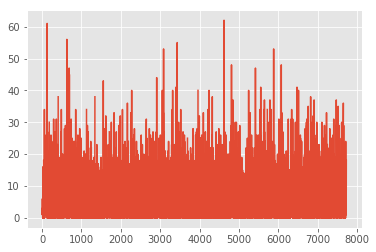

In [85]:
# Plot and see
df.years.plot()

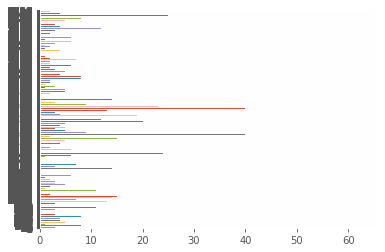

In [86]:
df.years.plot(kind='barh')

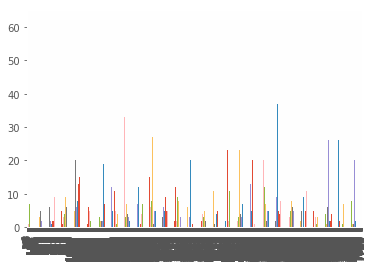

In [87]:
df.years.plot(kind='bar')

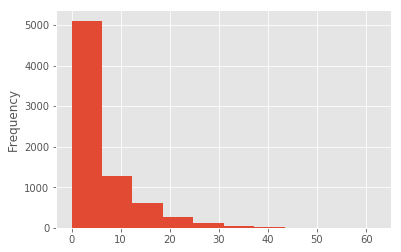

In [88]:
df.years.plot(kind='hist')

In [89]:
#What to do with the missing values in the column or parameter Year
df.years.fillna(df.years.median(), inplace=True)

In [90]:
df.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

# Explore

Two variables - age and income

/Users/jagritij/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:203: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


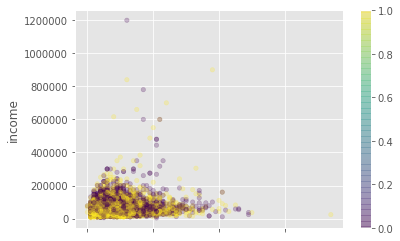

In [91]:
df.plot.scatter(x ='age', y='income', color=df.default, alpha =0.25, cmap='viridis')

/Users/jagritij/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:203: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


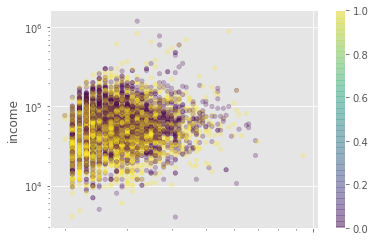

In [92]:
df.plot.scatter(x ='age', y='income', color=df.default, alpha =0.25, cmap='viridis', logx='true', logy='false')

# Transform the Data, Normalizing, to get it on the same scale, as in MSE will be less accurate


In [93]:
X = df[['age', 'income']]

In [94]:
X =np.log(X)

In [95]:
y = df['default']

In [96]:
X

,age,income
0,3.178054,9.862666
1,3.332205,11.097410
2,3.583519,11.002100
3,3.178054,11.034890
4,3.332205,9.903488
5,3.295837,9.392662
6,3.135494,10.778956
7,3.044522,10.596635
8,3.367296,11.002100
9,3.091042,11.350407


In [97]:
X.head()

,age,income
0,3.178054,9.862666
1,3.332205,11.097410
2,3.583519,11.002100
3,3.178054,11.034890
4,3.332205,9.903488


# Model the Data

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
clf2=DecisionTreeClassifier(max_depth=20)

In [165]:
clf2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [166]:
from modelvis import plot_classifier_2d

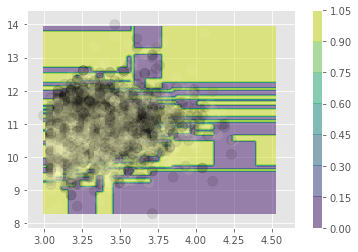

In [167]:
plot_classifier_2d(clf2, X, y, alpha=0.1)

In [168]:
#RGB A - Alpha - making it transparent 0.0

In [169]:
clf3=DecisionTreeClassifier(max_leaf_nodes=4)

In [170]:
#DecisionTreeClassifier?


In [171]:
clf3.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

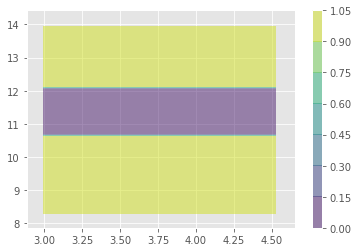

In [172]:
plot_classifier_2d(clf3, X, y, alpha=0.0)

In [173]:
from sklearn import tree

In [174]:
import pydotplus
from iPython.display import image

ModuleNotFoundError: No module named 'iPython'

### How to get probabilities and predictions

In [175]:
y_p =clf2.predict(X)    # y_p
y_prob =clf2.predict_proba(X)    # y_prob

(array([ 4492.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3235.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

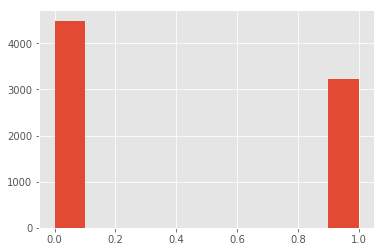

In [176]:
plt.hist(pred_class)

In [177]:
y_prob      #y_prob

array([[ 0.71428571,  0.28571429],
       [ 0.35      ,  0.65      ],
       [ 0.33333333,  0.66666667],
       ..., 
       [ 0.        ,  1.        ],
       [ 0.4921875 ,  0.5078125 ],
       [ 0.42307692,  0.57692308]])

([array([ 1205.,    72.,   223.,   804.,  1255.,  1559.,   523.,   481.,
           187.,  1418.]),
  array([ 1418.,    97.,   581.,   513.,  1151.,  1663.,   804.,   173.,
           112.,  1215.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

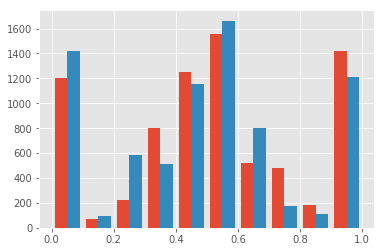

In [178]:
plt.hist(y_prob)

In [179]:
def pred_df(clf, X, y):
    clf = clf.fit(X,y)
    y_pred =clf.predict(X)
    y_proba =clf.predict_proba(X)[:,1]
    pred_df =pd.DataFrame( {"actual":np.array(y), "probability":y_proba, "predicted":y_pred})
    return pred_df
    

In [180]:
pred_df(clf2, X, y).head(10)

,actual,predicted,probability
0,0,0,0.285714
1,1,1,0.650000
2,0,1,0.666667
3,0,0,0.333333
4,1,0,0.500000
5,1,0,0.250000
6,1,0,0.492754
7,0,0,0.494118
8,0,1,0.593750
9,0,1,0.571429


In [181]:
pred2 =pred_df(clf2, X, y)

In [182]:
pd.crosstab(pred2.predicted, pred2.actual)

actual,0,1
predicted,,
0,3105,1060
1,925,2637


In [183]:
import seaborn as sns

In [184]:
def plot_prediction(pred_df):
    pred_df_0 = pred_df[pred_df.actual==0]
    pred_df_1 = pred_df[pred_df.actual==1]
    sns.kdeplot(pred_df_0.probability, shade=True, label = "no default")
    sns.kdeplot(pred_df_1.probability, shade=True, label = "default")

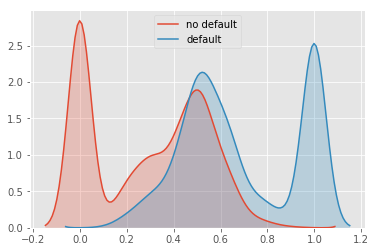

In [185]:
plot_prediction(pred2)

In [187]:
#Excercise, inside the classifier change the max depth to 10 and see how graph changes

In [206]:
clf4=DecisionTreeClassifier(max_depth=7000)

In [207]:
new_df = pred_df(clf4, X, y)

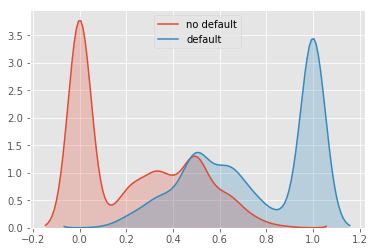

In [208]:
plot_prediction(new_df)

In [ ]:
# Try Reiver Operating Curve, TPR, AUC

In [213]:
from sklearn.metrics import roc_auc_score, roc_curve

In [211]:
def plot_roc_auc(pred_df):
    fpr, tpr, thresholds = roc_curve(pred_df.actual, pred_df.probability)
    auc_score = roc_auc_score(pred_df.actual, pred_df.probability)
    plt.plot(fpr, tpr, label="AUC=%0.2f" % auc_score)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    return print("AUC=%0.2f" %auc_score)

AUC=0.91


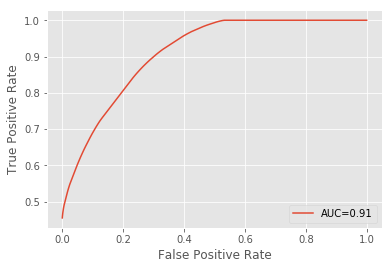

In [214]:
plot_roc_auc(pred_df(clf4, X, y))

# Cross Validation

In [215]:
from sklearn.model_selection import StratifiedKFold

In [234]:
def cross_val(clf5, X, y, k):
    #instantiate the k fold
    kf = StratifiedKFold(n_splits=k)
    
    # Store the results
    kfold_auc_score =[]
    
    #Run kfold CV
    for train_index, test_index in kf.split(X,y):
    
        #build the model on train data
        clf5=clf5.fit(X.iloc[train_index], y.iloc[train_index])
    
        #Predict the y_prob on the test data
        y_proba =clf.predict_proba(X.iloc[test_index])[:,1]
    
        #Calculate the auc score on the test data -actual vs predicted proba
        auc_score =roc_auc_score(y.iloc[test_index], y_proba)
    
        #print(auc_score)
    
        # Store the auc_score
    
        kfold_auc_score.append(auc_score)
    
    print("Mean KFold CV:", np.mean(kfold_auc_score))
    

In [235]:
cross_val(clf4, X, y, 5)

Mean KFold CV: 0.816311881031


In [236]:
for i in range (1, 20):
    
    clf=DecisionTreeClassifier(max_depth=i)
    cross_val(clf, X, y, 5)

Mean KFold CV: 0.559023604102
Mean KFold CV: 0.567988788054
Mean KFold CV: 0.568739899135
Mean KFold CV: 0.572087835501
Mean KFold CV: 0.568777690799
Mean KFold CV: 0.571204942515
Mean KFold CV: 0.571896783114
Mean KFold CV: 0.567280455602
Mean KFold CV: 0.563695528743
Mean KFold CV: 0.561510857747
Mean KFold CV: 0.561941665792
Mean KFold CV: 0.558093284929
Mean KFold CV: 0.55974755516
Mean KFold CV: 0.558180503373
Mean KFold CV: 0.558207039031
Mean KFold CV: 0.556413862531
Mean KFold CV: 0.562864923217
Mean KFold CV: 0.561946971971
Mean KFold CV: 0.557066367121



# Excercise, do all that for all features